In [15]:
import requests
from bs4 import BeautifulSoup
import time
import pandas as pd

## 1. Print the data of first 3 movies

Find and print the name and genre of the first 3 titles


In [16]:
link="https://www.imdb.com/search/title?release_date=2018&sort=num_votes,desc&page=1&ref_=adv_nxt"
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
}

# Make the request with headers

data=BeautifulSoup(requests.get(link,headers=headers).text,'html.parser')

In [17]:
for i in range(3):
    print(data.find_all(class_="sc-74bf520e-2 cVXqoq")[i].h3.string,end=' ; ')
    url="https://www.imdb.com"+data.find_all(class_="sc-74bf520e-2 cVXqoq")[i].a['href']
    data2=BeautifulSoup(requests.get(url,headers=headers).text,'html.parser')
    genre_list=data2.find_all(class_="ipc-chip__text")
    genres=[]
    for i in genre_list[:-1]:
        print(i.text,end=', ')
    print()

1. Avengers: Infinity War ; Action, Adventure, Sci-Fi, 
2. Black Panther ; Action, Adventure, Sci-Fi, 
3. Spider-Man: Into the Spider-Verse ; Animation, Action, Adventure, 


# 2. titles with most votes
Print the names of movies with highest number of votes from year 2010 to 2014


Note : Print the titles line wise starting from year 2010


In [18]:
link="https://www.imdb.com/search/title/?release_date=2010-01-01,2010-12-31&sort=num_votes,desc"

for i in range(5):
    print(f"201{i}")
    data=BeautifulSoup(requests.get(
        f"https://www.imdb.com/search/title/?release_date=201{i}-01-01,201{i}-12-31&sort=num_votes,desc",
        headers=headers).text,'html.parser')
    all_titles=data.find_all(class_='sc-b189961a-0 hBZnfJ',limit=100)
    for x in all_titles[:10]:
        print(x.h3.string)
    print()

2010
1. Inception
2. Shutter Island
3. The Walking Dead
4. Sherlock
5. Toy Story 3
6. Iron Man 2
7. Black Swan
8. How to Train Your Dragon
9. The Social Network
10. The King's Speech

2011
1. Game of Thrones
2. Harry Potter and the Deathly Hallows: Part 2
3. Intouchables
4. Thor
5. Captain America: The First Avenger
6. X: First Class
7. Drive
8. Black Mirror
9. Limitless
10. Rise of the Planet of the Apes

2012
1. The Dark Knight Rises
2. Django Unchained
3. The Avengers
4. The Hunger Games
5. The Hobbit: An Unexpected Journey
6. Silver Linings Playbook
7. Skyfall
8. The Amazing Spider-Man
9. Life of Pi
10. Ted

2013
1. The Wolf of Wall Street
2. Iron Man Three
3. Gravity
4. Prisoners
5. Man of Steel
6. 12 Years a Slave
7. Thor: The Dark World
8. The Hunger Games: Catching Fire
9. World War Z
10. Now You See Me

2014
1. Interstellar
2. Guardians of the Galaxy
3. Gone Girl
4. Whiplash
5. Captain America: The Winter Soldier
6. The Grand Budapest Hotel
7. The Imitation Game
8. X-Men: Days

# Applications of AI
Find and print all applications of AI (As present in Contents of the page)


Note : Print applications line wise


In [19]:
link="https://en.wikipedia.org/wiki/Artificial_intelligence"

data=BeautifulSoup(requests.get(link).text,'html.parser')

In [20]:
titles=[]
all_h3=data.find_all(class_='mw-headline')
start=False
for i in all_h3:
    if i.string=="Applications":
        start=True
    elif i.string=='Ethics':
        start=False
    if start:
        titles.append(i.string)

    

In [21]:
for i in titles:
    print(i)

Applications
Health and medicine
Games
Finance
Military
Generative AI
Other industry-specific tasks


# Image with maximum area
Find and print the src of the img tag which occupies the maximum area on the page.


Note :
Ignore images which doesn't have height or width attributes

In [22]:
all_imgs=data.find_all('img')
heights=[]
widths=[]

for i in all_imgs:
    if 'height' in i.attrs and 'width' in i.attrs:
        heights.append(int(i['height']))
        widths.append(i['width'])

In [23]:
sizes=pd.DataFrame(heights,columns=['height'])
sizes['width']=widths

sizes.sort_values('height',ascending=False)[:5]

,height,width
4,260,260
8,223,260
11,220,220
7,215,380
9,196,220


In [24]:
data.find(width="260",height="260")['src']

'//upload.wikimedia.org/wikipedia/commons/thumb/e/e8/General_Formal_Ontology.svg/260px-General_Formal_Ontology.svg.png'

# 4. Quotes with tag humor
Find all the quotes that have the tag as "humor" from this website


In [25]:
link="http://quotes.toscrape.com/"

data=BeautifulSoup(requests.get(link).text,'html.parser')
data.find_all(class_="tags")[0].find_all('a',class_="tag")


all_quotes=data.find_all(class_='quote')

for i in all_quotes:
    all_tags=i.find_all(class_='tags')[0].find_all('a')
    for x in all_tags:
        if x.string=="humor":
            print(i.find(class_='text').string)

“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”
“A day without sunshine is like, you know, night.”


# 5. Print all authors

Find and print the names of all the different authors from all pages of this website


Note : Print the names of all authors line wise sorted in dictionary order


In [35]:
all_authors=data.find_all(class_='author')
l=[x.string for x in all_authors]
for i in range(2,11):
    link=f"https://quotes.toscrape.com/page/{i}/"
    data2=BeautifulSoup(requests.get(link).text,'html.parser')
    all_authors=data2.find_all(class_='author')
    for x in all_authors:
        l.append(x.string)

In [36]:
all_authors_df=pd.Series(l)
all_authors_df.sort_values()

0       Albert Einstein
53      Albert Einstein
37      Albert Einstein
28      Albert Einstein
26      Albert Einstein
            ...        
61      Suzanne Collins
72      Terry Pratchett
7      Thomas A. Edison
77          W.C. Fields
36    William Nicholson
Length: 100, dtype: object

In [37]:
len(l)

100

# 6. Birth Date of authors

Find the birth date of authors whose name start with 'J' from this website

Note : Print a dictionary containing the name as key and the birth date as value.The Names of authors should be alphabetically sorted.


In [27]:
author_birth_dates={}

for i in all_quotes:
    if i.find(class_="author").string[0].lower()=='j':
        link="http://quotes.toscrape.com"+i.find("a")['href']
        data2=BeautifulSoup(requests.get(link).text,'html.parser')
        author_birth_dates[i.find(class_="author").string]=data2.find(class_="author-born-date").string
        

In [28]:
author_birth_dates

{'J.K. Rowling': 'July 31, 1965', 'Jane Austen': 'December 16, 1775'}

# 7. Quotes by Albert Einstein

Find all the quotes by Albert Einstein(in the order they appear on the page) from this website

Note : Fetch data from all the pages.


In [40]:
links=["https://quotes.toscrape.com/"]
for i in range(2,11):
    links.append(f"https://quotes.toscrape.com/page/{i}/")
links

['https://quotes.toscrape.com/',
 'https://quotes.toscrape.com/page/2/',
 'https://quotes.toscrape.com/page/3/',
 'https://quotes.toscrape.com/page/4/',
 'https://quotes.toscrape.com/page/5/',
 'https://quotes.toscrape.com/page/6/',
 'https://quotes.toscrape.com/page/7/',
 'https://quotes.toscrape.com/page/8/',
 'https://quotes.toscrape.com/page/9/',
 'https://quotes.toscrape.com/page/10/']

In [41]:
for i in links:
    data=BeautifulSoup(requests.get(i).text,'html.parser')
    all_quotes=data.find_all(class_='quote')
    for x in all_quotes:
        if x.find(class_='author').string == "Albert Einstein":
            print(x.find(class_='text').string)

“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”
“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”
“Try not to become a man of success. Rather become a man of value.”
“If you can't explain it to a six year old, you don't understand it yourself.”
“If you want your children to be intelligent, read them fairy tales. If you want them to be more intelligent, read them more fairy tales.”
“Logic will get you from A to Z; imagination will get you everywhere.”
“Any fool can know. The point is to understand.”
“Life is like riding a bicycle. To keep your balance, you must keep moving.”
“If I were not a physicist, I would probably be a musician. I often think in music. I live my daydreams in music. I see my life in terms of music.”
“Anyone who has never made a mistake has never tried anything new.”


# All Tasks Completed

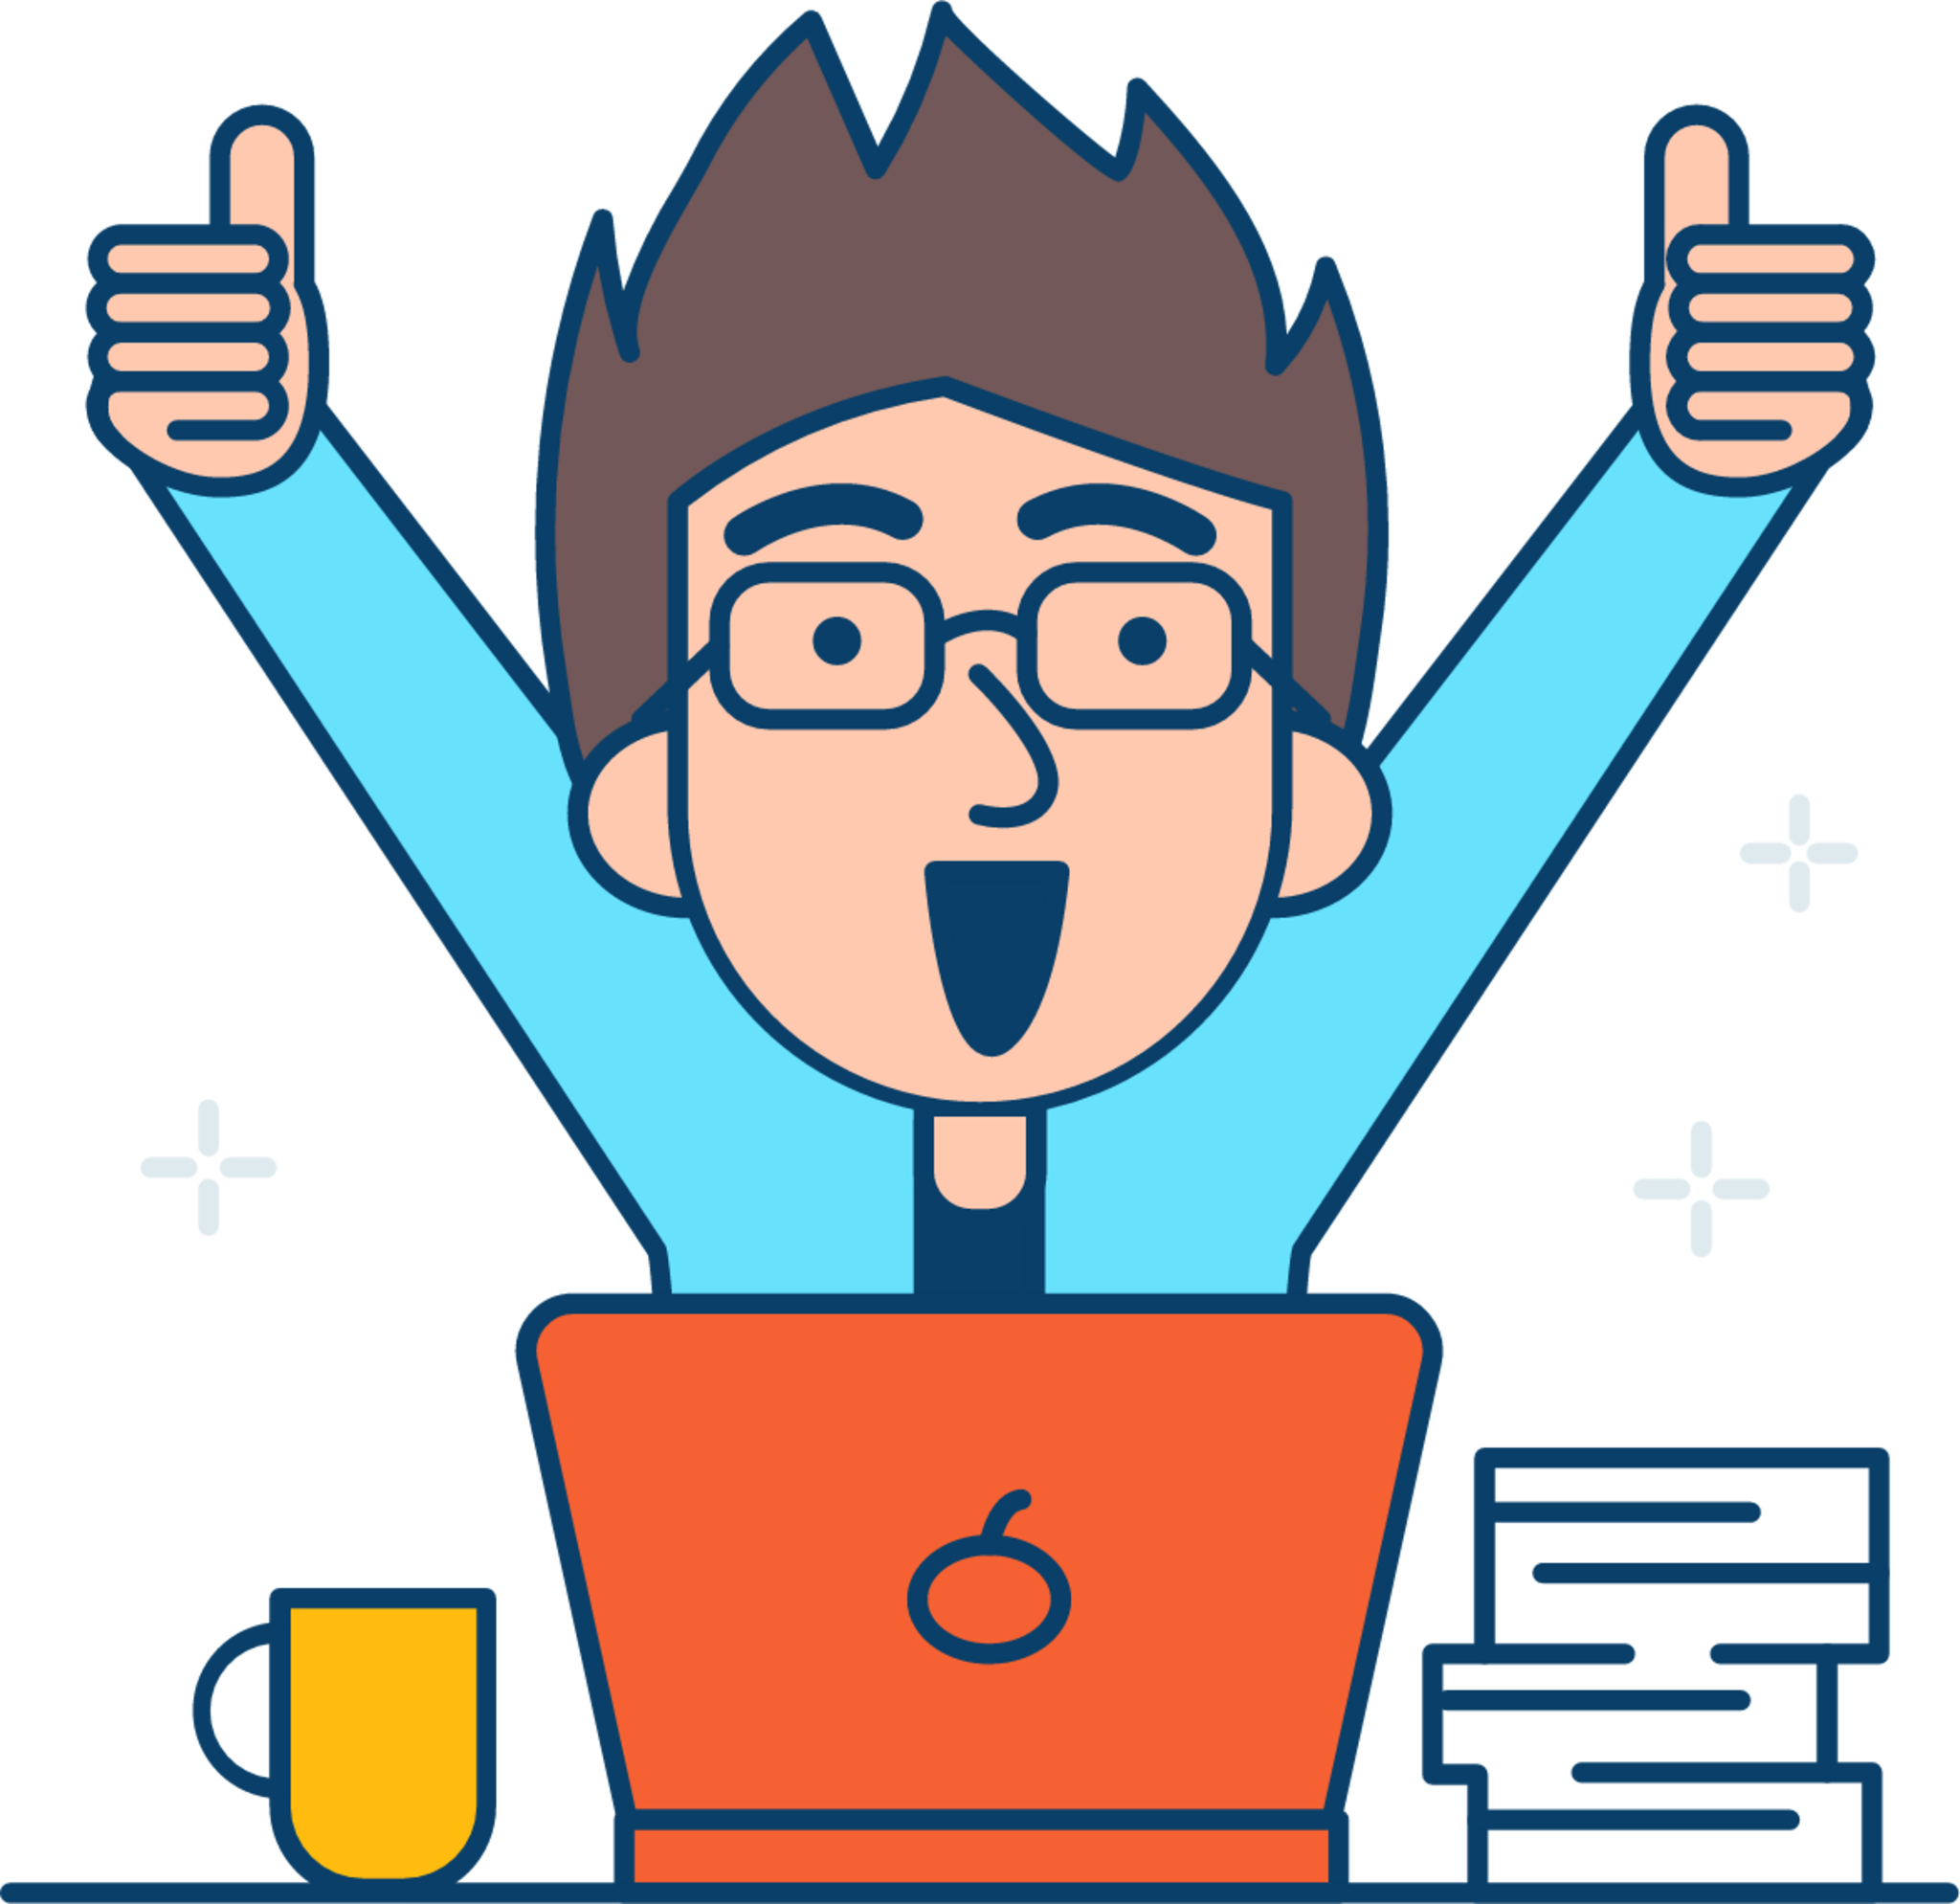